확률의 수학적 정의와 의미
- 표본공간과 확률표본
 * 확률표본 또는 표본은 풀고자 하는 문제에서 발생할 수 있는 하나의 현상 혹은 선택될 수 있는 하나의 경우를 말한다.
 * 표본공간은 가능한 모든 표본의 집합을 말하며 고려하는 범위에서 어떤 표본(경우, 현상)이 가능하고 어떤 표본이 가능하지 않은가를 정의하는 작업
 * 사건은 표본공간의 부분집합. 즉 전체 표본공간 중에서 관심을 가지는 일부 표본의 집합

확률
- 확률이란 사건(부분집합)을 입력하면 숫자(확률값)가 출력되는 함수
- 모든 각각의 사건(부분집합)에 어떤 숫자를 할당하는 함수
- 확률은 표본이 아닌 사건을 입력으로 가지는 함수

확률의 의미
- 빈도주의 관점 : 반복적으로 선택된 표본이 사건 A의 원소가 될 경향. 동전을 던져 앞면이 나오는 사건의 확률값은 0.5
- 베이지안 관점 : 선택된 표본이 특정한 사건에 속한다는 가설, 명제 혹은 주장의 신뢰도로 반복이라는 개념은 사용되지 않음. 새가 날 수 있는 가능성은 95%. '앞면이 나왔다'는 주장의 신뢰도가 0.5
 * 베이지안 확률론에서 사건이 일어났다 혹은 발생했다하는 말은 그 사건의 원소 중에 정말로 선택된 표본이 있다는 사실을 알게되었다는 것을 말한다.
 
확률의 성질
- 공집합의 확률 : 공집합인 사건의 합은 0이다.P(0) = 0
- 여집합의 확률 : 어떤 사건의 여집합인 사건의 확률은 1 - 원래 사건의 확률 과 같다.
- 포함-배제의 원리 : 두 사건의 합집함의 확률은 각 사건의 확률의 합에서 두 사건의 교집합의 확률을 뺀 것과 같다.
- 전체 확률의 법칙 : 생일이 1월인 남자라는 사건의 확률과 생일이 2월인 남자라는 사건의 확률, 이외에도 각각의 월을 생일로 가지는 남자라는 사건들의 확률을 모두 합하면 남자라는 사건의 확률이 된다. 각각의 월에 있는 남자의 생일이 서로 공통 원소가 없음.

확률분포함수
- 확률이 어디에 어는 정도 분포되어 있는지를수학적으로 명시하고 전달하는 도구
- 만약 표본의 개수가 무한하다면 현실적으로 모든 사건을 하나하나 기술하는 것은 불가능하며 확률분포함수를 이용하여 이 문제를 해결
 * 확률질량함수 : 유한 개의 사건이 존재하는 경우 각 단수사건에 대한 확률만 정의하는 함수
 * 누적분포함수 : 시작점을 모두 똑같이 음의 무한대로 통일한 특수한 구간을사용하는 사건의 확률분포를 묘사하는 함수
 * 확률밀도함수 : 누적분포함수를 미분하여 구한 도함수를 의미하며 특정한 구간의 확률이 다른 구간에 비해 상대적으로 얼마나 높은가를 나타내는 것이며 그 값 자체가 확률은 아니다.
 
확률변수
- 확률적인 숫자 값을 출력하는 변수

추측통계

확률을 사용하여 모집단의 통계적 성질을 추출하는 기법

[모집단 분포와 표본분포]
- 모집단 : 어떤 통계적 실험의 대상이 되는 모든 대상물. ex) 대한민국 모든 남성의 키 데이터, 2018 수능점수 데이터
- 모집단 분포 : 모집단은 데이터 집단이므로 어떠한 분포를 이루며 이 데이터가 이루는 확률 분포가 모집단 분포
- 모수 : 모집단의 특성을 나타내는 수치로 모평균, 모분산, 모표준편차, 모비율, 모상관관계 등
- 표본 : 모집단의 모수(특성)을 알기 위하여 표본을 추출해서 모집단의 모수를 추정
- 확률표본 : 모집단을 구성하는 모든 구성원이 표본으로 뽑힐 확률을 동일하게 하여 추출한 표본. Random이란 무작위라는 의미로 어떻한 의도를 가지지 않는다는 것을 의미하며 모든 구성원이 뽑힐 확률이 동일하다는 개념
- 통계량 : 확률표본의 특성을 설명하는 값으로 표본평균, 표본분산, 표본표준편차, 표본비율, 표본상관관계 등  
  모수는 모집단이 변하지 않기 때문에 그 값이 변하지 않으나 통계량은 표본을 어떻게 추출하느냐에 따라서 그 값이 다르게 나타난다.
- 확률변수 : 무작위 실험을 했을 때 특정 확률로 발생하는 각각의 결과를 수치값으로 표현한 변수. 동전의 앞과 뒤
- 확률분포 : 확률변수 X의 모든 값과 그에 대응하는 확률값들의 분포.
- 통계량이 확률변수라는 의미 : 확률변수의 확률분포가 수학적으로 설명가능한 분포(예, 정규분포)를 따른다고 하면 특정 확률변수와 확률함수를 알고 있다면 특정 사건이 일어날 확률을 계산할 수 있으며 더 나아가 모수와 통계량의 관계를 알고있다면 그것을 통해 모수에 대한 통계적인 추정을 할 수 있다. 즉 통계량의 확률 함수 또는 표본분포를 안다고 가정하면 이를 이용해 모수를 추정할 수 있다.




[표본통계량 성질]
- 샘플사이즈가 크면 표본평균은 모평균에 가까워진다.
- 샘플사이즈가 커질수록 표본평균의 표준편차가 작아진다. 샘플사이즈를 크게하면 흩어짐이 적은 신뢰할 수 있는 표본평균을 얻을 수 있다.
- 표준오차는 이론상 표본평균의 표준편차 크기인데 샘플사이즈가 커지면 표준오차는 작아짐
- 모분산은 0.64, 표본분산의 평균값은 0.575로 분산이 과소평가 되어짐 -> 불편분산을 사용 편향을 제거(ddof=1)
- 샘플사이즈가 커질수록 불편분산은 모분산에 가까워짐
- 불편성 : 추정량의 기댓값이 진짜 모수가 되는 특성. 편향이 없는 추정량
- 일치성 : 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성
- 표본평균과 불편분산은 둘다 불편성을 가지고 있다고 할 수 있다.
- 샘플사이즈를 크게하면 표본평균은 모평균에 가까워지고 불편분산은 모분산에 가까워지므로 일치성을 가짐
- 큰수의 법칙 : 표본의 크기가 커지면 표본평균이 모평균에 가까워지는 방법을 표현한 법칙
- 중심극한정리 : 모집단분포가 무엇이든지간에 샘플사이즈가 커지면 표본 평균들이 이루는 분포가 모집단의 평균 $\mu, 표준편차 \sigma/sqrt(n)$인 정규분포에 가까워진다는 정리

In [2]:
# 모집단과 표본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ch4_scores400.csv')
df.shape
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [3]:
# 복원추출
np.random.choice([1,2,3],3)

array([2, 3, 2])

In [4]:
# 비복원추출
np.random.choice([1,2,3],3, replace=False)

array([3, 1, 2])

In [6]:
np.random.seed(0)
sample = np.random.choice(scores,20)
sample.mean()

70.4

In [7]:
scores.mean()

69.53

In [8]:
for i in range(5):
    sample = np.random.choice(scores,20)
    print(sample)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균',sample.mean(),'\n')

[56 55 79 91 86 79 83 55 85 76 81 57 77 99 61 57 81 73 59 59]
1번째 무작위 추출로 얻은 표본평균 72.45 

[80 50 85 86 85 59 72 58 31 60 56 64 49 88 66 63 63 47 67 45]
2번째 무작위 추출로 얻은 표본평균 63.7 

[31 55 77 61 54 57 72 46 52 76 92 63 63 80 94 70 76 61 80 61]
3번째 무작위 추출로 얻은 표본평균 66.05 

[47 60 65 86 65 74 76 60 85 78 73 70 68 86 58 74 67 67 83 92]
4번째 무작위 추출로 얻은 표본평균 71.7 

[54 73 92 81 87 56 96 57 93 67 90 54 90 75 46 80 63 57 78 94]
5번째 무작위 추출로 얻은 표본평균 74.15 



In [10]:
# 확률분포(균형이 안맞는 주사위를 가정)
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]

In [11]:
np.random.choice(dice,p=prob)

1

In [14]:
np.random.seed(1)
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([4, 6, 1, 4, 3, 2, 3, 4, 4, 5, 4, 5, 3, 6, 1, 5, 4, 5, 2, 3, 6, 6,
       4, 5, 6, 6, 2, 1, 3, 6, 2, 4, 6, 5, 5, 4, 5, 6, 1, 6, 6, 6, 3, 6,
       2, 4, 6, 4, 4, 2, 1, 5, 3, 3, 5, 2, 5, 3, 5, 5, 2, 4, 5, 4, 2, 5,
       5, 5, 6, 5, 6, 2, 2, 6, 4, 3, 6, 4, 6, 6, 6, 5, 6, 4, 3, 6, 4, 6,
       5, 5, 2, 6, 4, 5, 4, 3, 6, 5, 1, 5])

In [16]:
freq, _ = np.histogram(sample,bins=6, range=(1,7))
print(freq,'\n')
rdf = pd.DataFrame({'frequency':freq,
                   'relative frequency':freq/num_trial},
                  index = pd.Index(np.arange(1,7),name='dice'))
rdf

[ 6 12 12 20 24 26] 



,frequency,relative frequency
dice,,
1,6,0.06
2,12,0.12
3,12,0.12
4,20,0.20
5,24,0.24
6,26,0.26


In [17]:
np.linspace(1.5,6.5,6)

array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0, 0.5, 'relative frequency')

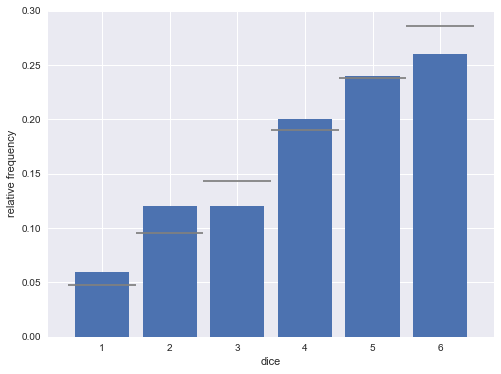

In [21]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.hist(sample,bins=6,range=(1,7),density=True,rwidth=0.8)
# 실제 확률분포를 가로선으로 표시
ax.hlines(prob,np.arange(1,7), np.arange(2,8), colors='gray')
# 막대 그래프
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

Text(0, 0.5, 'relative frequency')

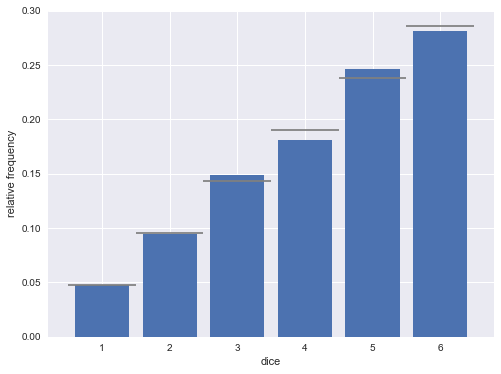

In [22]:
# https://codetorial.net/matplotlib/set_lines.html
num_trial = 10000
sample = np.random.choice(dice,size=num_trial,p=prob)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.hist(sample,bins=6,range=(1,7),density=True,rwidth=0.8)
# 실제 확률분포를 가로선으로 표시
ax.hlines(prob,np.arange(1,7), np.arange(2,8), colors='gray')
# 막대 그래프
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

In [23]:
# 추측통계에서의 확률
df = pd.read_csv('./data/ch4_scores400.csv')
scors=np.array(df['score'])

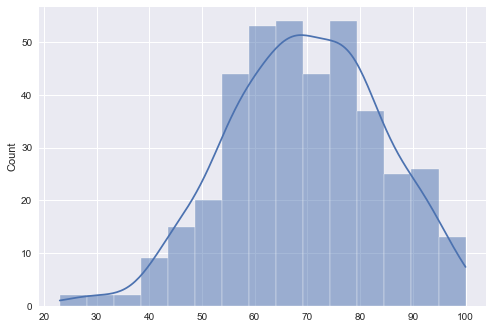

In [24]:
# Seaborn에는 5가지 기본 제공 테마가 있다. darkgrid, whitegrid, dark, white, ticks

import seaborn as sns

sns.set_style('darkgrid')
sns.histplot(scores, kde=True)
plt.show()

(20.0, 120.0, 0.0, 0.042)

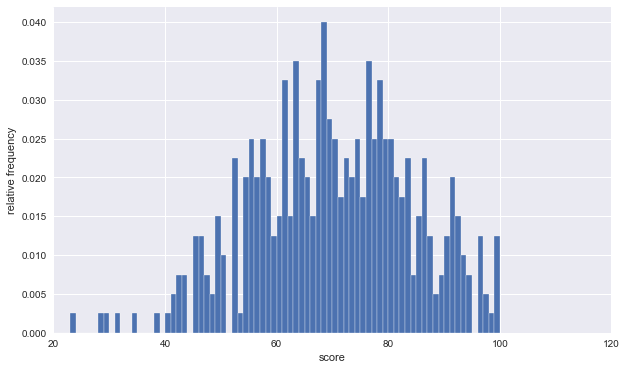

In [25]:
plt.figure(figsize=(10,6))
plt.hist(scores,bins=100,range=(0,100),density=True)
plt.xlabel('score')
plt.ylabel('relative frequency')
plt.axis([20,120,0,0.042])

In [ ]:
# Q. y축을 빈도, 상대빈도로 표시하여 그래프를 비교하세요.

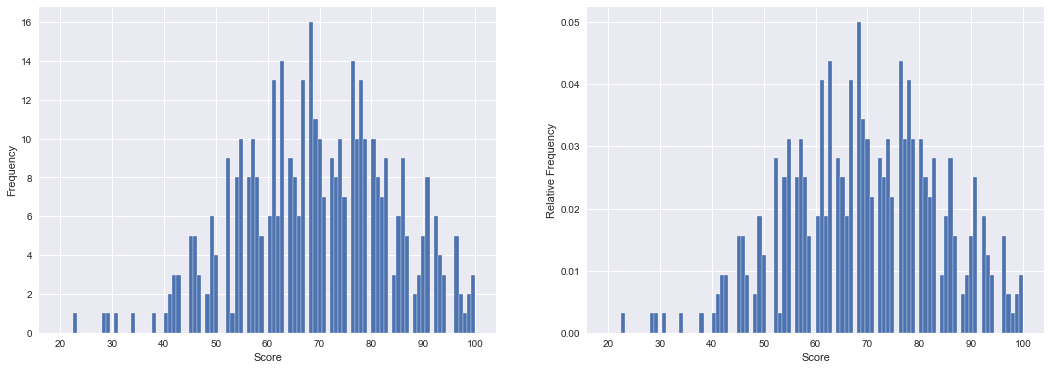

In [27]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(scores, bins=100, range=(20,100))
ax2.hist(scores, bins=100, range=(20,100), density=True)
# density를 넣으면 y축이 빈도가 아니라 밀도로 바뀐다
ax1.set_xlabel('Score')
ax2.set_xlabel('Score')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Relative Frequency')
plt.show()

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# [과제] 평균이 4, 표준편차가 0.8인 정규분포를 따르는 모집단으로 부터 10000개의 표본을 추출하여 저장하고 그 중 10개를 출력하세요.
from scipy.stats import norm
pop=norm(loc=4,scale=0.8)
arr=pop.rvs(10000)
arr[:10]

array([2.80366594, 4.42239502, 1.88299616, 3.2776679 , 2.34517513,
       5.19227693, 4.68740389, 3.58772636, 3.47318854, 4.10987574])

평균: 4.0
표준편차: 0.8


<AxesSubplot:ylabel='Count'>

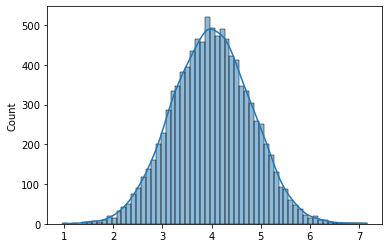

In [9]:
# [과제] 위 과제에서 10000개의 표본의 평균 및 표준편차를 구하고 시각화하여 정규분표를 따르는지를 확인하세요.
print('평균:',arr.mean().round())
print('표준편차:',arr.std().round(1))
import seaborn as sns
sns.histplot(arr,kde=True)

In [5]:
# [도전과제] 샘플사이즈를 순차적으로 늘렸을 때 표본평균이 모평균(4)에 가까워짐을 시각화하여 입증하세요.

<AxesSubplot:ylabel='Count'>

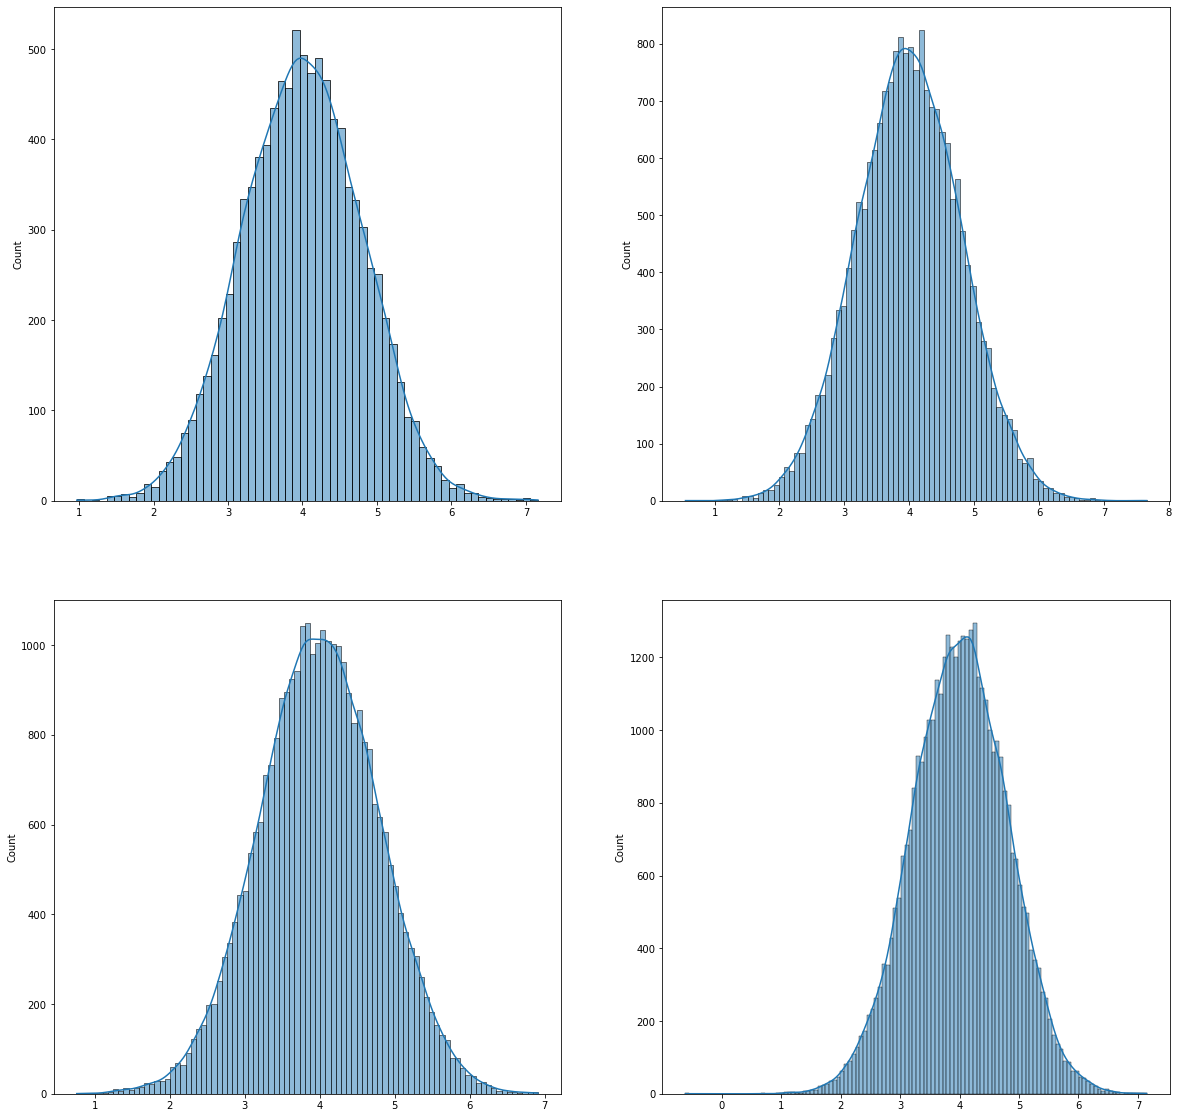

In [30]:
arr2=pop.rvs(20000)
arr3=pop.rvs(30000)
arr4=pop.rvs(40000)
fig, ax = plt.subplots(figsize=(20,20),nrows=2,ncols=2)
sns.histplot(arr,kde=True,ax=ax[0][0])
sns.histplot(arr2,kde=True,ax=ax[0][1])
sns.histplot(arr3,kde=True,ax=ax[1][0])
sns.histplot(arr4,kde=True,ax=ax[1][1])

Wall time: 18.2 s


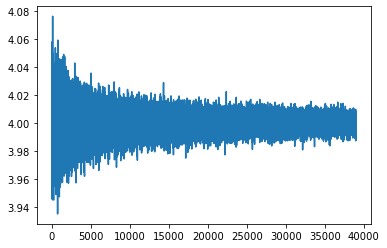

In [14]:
%%time
lst=[]
for i in range(1000,40000):
    lst.append(pop.rvs(i).mean())
plt.plot(lst)

Wall time: 5 s


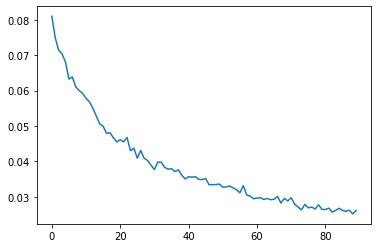

In [142]:
%%time
#샘플사이즈가 커질수록 표본평균의 표준편차가 작아짐을 시각화 하시오
def meaning(a):
    lst=[]
    for i in range(1000):
        lst.append(pop.rvs(a).mean())
    return lst

res=[]
for i in range(100,1000,10):
    res.append(np.std(meaning(i)))

plt.plot(res)


Wall time: 421 ms


<AxesSubplot:xlabel='size', ylabel='mean'>

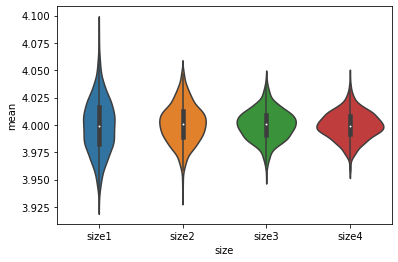

In [123]:
%%time
#샘플사이즈가 커질수록 표본평균의 흩어지는 정도가 작아져서 모평균에 가깝게 모이는 현상을 바이올린플롯으로 시각화 하시오
def meaning(a):
    lst=[]
    for i in range(1000):
        lst.append(pop.rvs(a).mean())
    return lst

arr1 =pd.DataFrame(meaning(1000))
arr1['size']='size1'
arr2=pd.DataFrame(meaning(2000))
arr2['size']='size2'
arr3=pd.DataFrame(meaning(3000))
arr3['size']='size3'
arr4=pd.DataFrame(meaning(4000))
arr4['size']='size4'
df=pd.concat([arr1,arr2,arr3,arr4])
df.columns = ['mean', 'size']
sns.violinplot(x='size',y='mean',data=df)


Text(0, 0.5, 'relative frequency')

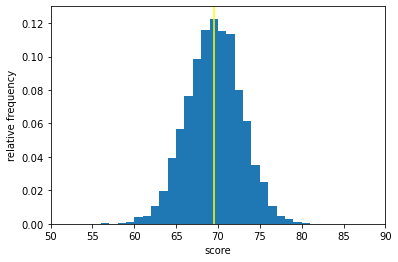

In [152]:
#무작위 추출로 표본크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그리고 모평균 중심으로 분포하는지 여부를 확인하고 모평균 추정의 근거를 설명

df=pd.read_csv('data/ch4_scores400.csv')
scores=np.array(df['score'])


sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

plt.hist(sample_means, bins=100, range=(0,100), density=True)
plt.vlines(np.mean(scores), 0, 1, 'yellow')
plt.axis([50,90,0,0.13])
plt.xlabel('score')
plt.ylabel('relative frequency')